In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
%matplotlib inline

Autoencoder is a Unsupervised Deep Learning Algorithm which used for dimensionality reduction. 

Autoencoder have two parts:
1. Encoder is use to encode larger feature dimensions into small feature dimensions.
2. Decoder is used because auto encoder is an unsupervised deep learning algorithm. So, we don't have labelled data to check whether we are going in right direction or not. So decoder will re-construct all the encoded features to check whether we are doing correct or not. 


In [2]:
## Importing the CIFAR-10 Dataset
path = os.path.join('..', 'Dataset', 'CIFAR10')
os.listdir(path)

['batches.meta',
 'data_batch_1',
 'data_batch_2',
 'data_batch_3',
 'data_batch_4',
 'data_batch_5',
 'readme.html',
 'test_batch']

In [3]:
def unpickle(path):
    '''
    This function will Unpickle the data 
    '''
    with open(path, 'rb') as f:
        data = pickle._Unpickler(f)
        data.encoding = 'latin1'
        d = data.load()
    return d

def one_hot_encode(data, categories):
    
    val = np.eye(categories)
    return val[data]

def data_load():
    data = [unpickle(path + '\\data_batch_{}'.format(i)) for i in range(1, 6)]
    images = np.vstack([i['data'] for i in data])
    label = np.hstack([i['labels'] for i in data])
    images = images.reshape(images.shape[0], 3, 32, 32).transpose(0, 2, 3, 1)
    
    return images, one_hot_encode(label, 10)

In [4]:
images, labels = data_load()

In [5]:
def display_cifar(images, size):
     n = len(images)
     plt.figure(figsize = (5, 5))
     plt.gca().set_axis_off()
     im = np.vstack([np.hstack([images[np.random.choice(n)] for i in range(size)])
     for i in range(size)])
     plt.imshow(im)
     plt.show()

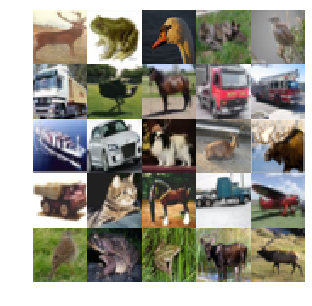

In [6]:
display_cifar(images, 5)

In [7]:
x = tf.placeholder(tf.float32, shape= (None, 3072), name = 'Input_Holder')

In [8]:
## Now , implementing the autoencoder 
reuse_Val1 = False
with tf.variable_scope('Encoder', reuse = reuse_Val1) as encode:
    
    Enc_L1 = tf.layers.dense(x, 1024, activation= None)
#     Enc_L2 = tf.layers.dense(Enc_L1, 49, activation = None)
    

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Colocations handled automatically by placer.


In [9]:

with tf.variable_scope('Decoder', reuse = reuse_Val1) as decode:
    
#     Dec_L1 = tf.layers.dense(Enc_L1, 1024, activation = None)
    Dec_L2 = tf.layers.dense(Enc_L1, 3072, activation = None)
    

In [10]:
with tf.variable_scope('Loss') as loss:
    
    loss_fun = tf.losses.mean_squared_error(x, Dec_L2)
    

Instructions for updating:
Use tf.cast instead.


In [11]:
with tf.variable_scope('optimization') as op:
    
    step_val = tf.train.AdamOptimizer().minimize(loss_fun)
    

In [12]:
## Defining the constants
loss_dir = []
batch_size = 128
epochs = 10
num_batch = images.shape[0] // batch_size

print ('Total number of batchs: ', num_batch)

Total number of batchs:  390


In [13]:
sess = tf.Session()

sess.run(tf.global_variables_initializer())

reshape_image = images.reshape(-1, 3072)

for epoch in range(epochs):
    
    for i in range(num_batch):
        
        batch = reshape_image[i * num_batch: (i + 1) * num_batch + 1]
        _, loss_val = sess.run([step_val, loss_fun], feed_dict = {x: batch})
        loss_dir.append(loss_val)
        
    _, loss_val = sess.run([step_val, loss_fun], feed_dict = {x: reshape_image[i * num_batch + 1:]})
    
    reuse_Val1 = True
    print ('Epoch: ', epoch, 'Loss: ', loss_val)


Epoch:  0 Loss:  0.0
Epoch:  1 Loss:  0.0
Epoch:  2 Loss:  0.0
Epoch:  3 Loss:  0.0
Epoch:  4 Loss:  0.0
Epoch:  5 Loss:  0.0
Epoch:  6 Loss:  0.0
Epoch:  7 Loss:  0.0
Epoch:  8 Loss:  0.0
Epoch:  9 Loss:  0.0


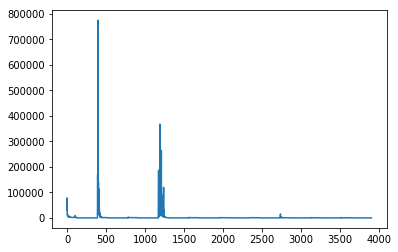

In [14]:
plt.plot(loss_dir)

In [15]:
loss_dir

[31537.139,
 78248.62,
 20993.55,
 14040.599,
 15388.21,
 12677.925,
 11274.155,
 8389.098,
 9368.507,
 8179.5254,
 6953.6035,
 7476.11,
 6913.3125,
 5724.813,
 5561.1626,
 5117.391,
 6313.1484,
 7114.9165,
 8035.936,
 6014.767,
 4324.6167,
 4213.0107,
 5973.8228,
 6533.667,
 4450.1313,
 3701.073,
 4242.9507,
 5560.3423,
 4088.517,
 3374.0742,
 3700.324,
 4152.473,
 3197.9907,
 3326.0762,
 3930.3447,
 3572.1445,
 2982.4353,
 3099.9155,
 3504.1387,
 2817.5142,
 2779.2224,
 3179.075,
 2944.747,
 2629.1584,
 2794.0654,
 2792.7437,
 2506.6687,
 2556.2668,
 2595.072,
 2708.2676,
 2436.161,
 2305.747,
 2464.2673,
 2395.112,
 2175.3113,
 2311.5713,
 2356.4102,
 2204.568,
 2166.8535,
 2223.4316,
 2216.0972,
 2173.2341,
 2124.7373,
 2067.1047,
 2218.0742,
 2124.6152,
 2090.2449,
 1974.3922,
 2020.8212,
 2017.6641,
 1955.9769,
 2005.6362,
 1957.0297,
 2019.5103,
 2004.1066,
 2007.4989,
 1913.5701,
 1857.0026,
 1930.7999,
 1813.0051,
 1855.8883,
 1908.7169,
 1765.8915,
 1715.5842,
 1758.1722,
 16

In [16]:
tf.trainable_variables()

[<tf.Variable 'Encoder/dense/kernel:0' shape=(3072, 1024) dtype=float32_ref>,
 <tf.Variable 'Encoder/dense/bias:0' shape=(1024,) dtype=float32_ref>,
 <tf.Variable 'Decoder/dense/kernel:0' shape=(1024, 3072) dtype=float32_ref>,
 <tf.Variable 'Decoder/dense/bias:0' shape=(3072,) dtype=float32_ref>]

TypeError: mean_squared_error() missing 2 required positional arguments: 'labels' and 'predictions'